# 画像のエッジ(輪郭)を抽出

本チュートリアルでは，ラプラシアンフィルタを用いて画像からエッジ(輪郭)を抽出します．
0. [Google Colaboratoryの基本的な使い方](#scrollTo=ToMgdzHztsaD)
1. [画像処理の基本](#scrollTo=UbIM7kK8dEPm)
2. [ラプラシアンフィルタを用いたエッジ(輪郭)抽出](#scrollTo=82CpAZRNrnX1)

## 0. Google Colaboratoryの基本的な使い方

　まず，下記のプログラムを見てください．「a」という変数に1を代入したあと，「a」という変数をPrintしているプログラムになります．このプログラムを実行すると「1」と表示されます．

In [ ]:
a = 1
print(a)

1


　次に，下記のプログラムを見てください．「b」という変数に先程の「a」という変数を2倍したものを代入したあと，「b」という変数をPrintしているプログラムになります．このプログラムを実行すると「2」と表示されます．

　このように，Google Colaboratoryでは，このファイル内で記述したプログラムは全て共有されます．あとは，基本的に普通のPythonのプログラミングと同じになります．

In [ ]:
b = a * 2
print(b)

2


## 1. 画像処理の基本

ここでは，画像処理の基本的なプログラム方法について説明します．まず，画像ファイルを読み込んで，画面に表示してみましょう．下記のプログラムで，Google Colaboratory上に画像をアップロードすることができます．

In [ ]:
from google.colab import files                  # ファイルを読み込むためのライブラリをインポート．

uploaded_file = files.upload()                  # 選択したファイルをアップロード．
uploaded_file_name = next(iter(uploaded_file))  # アップロードしたファイルの名前を取得．
print(uploaded_file_name)                       # ファイル名の表示．

Saving lenna.bmp to lenna (1).bmp
lenna.bmp


下記のプログラムで，上のコードブロックでアップロードしたファイルを画像データとして読み込み，描画することができます．

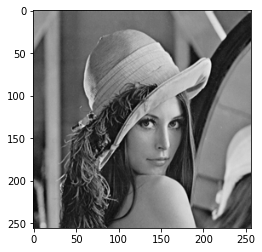

In [ ]:
import cv2                                      # 画像用のライブラリをインポート．
from matplotlib import pyplot as plt            # 描画用のライブラリをインポート．

img = cv2.imread(uploaded_file_name, 0)         # 画像ファイルを読み込む．
plt.imshow(img, cmap = "gray")                  # 読み込んだ画像の描画．

次に，読み込んだ画像の構成を確認してみましょう．下記のプログラムで，画像のサイズ，画像の[0, 0]の輝度値(画素値)，画像の全ピクセルの輝度値(画素値)をPrintすることができます．これらの情報を駆使してチュートリアルを進めていきます．

In [ ]:
print("画像のサイズ\t\t：\t{0}\n".format(img.shape))    # 画像のサイズ．
print("画像[0, 0]の濃度値\t：\t{0}\n".format(img[0,0])) # 画像の[0, 0]の輝度値(画素値)．
print("画像全ピクセルの濃度値\t：\n{0}\n".format(img))  # 全ピクセルの輝度値(画素値)．

画像のサイズ		：	(256, 256)

画像[0, 0]の濃度値	：	161

画像全ピクセルの濃度値	：
[[161 161 160 ... 165 170 152]
 [161 161 161 ... 166 170 153]
 [161 160 157 ... 167 168 153]
 ...
 [ 52  58  56 ...  77  89  88]
 [ 49  52  53 ...  88  98  97]
 [ 47  56  57 ...  97 100 105]]



## 2. ラプラシアンフィルタを用いたエッジ(輪郭)抽出

ダウンロードした画像の中から1つを選び，その画像にラプラシアンフィルタを適用することで，画像中のエッジ(輪郭)を抽出します．このとき，ラプラシアンフィルタは，下記に示すような8近傍型のカーネル$K_8$を使用します．また，画像にラプラシアンフィルタを適用した後の輝度値(画素値)が0～255の範囲外となった場合は，0よりも小さいなら0に，255以上なら255にするようにします．ここでは，画像の縁についての処理は省きます．

\begin{equation}
K_8 = 
  \begin{bmatrix}
    -1 & -1 & -1 \\
    -1 &  8 & -1 \\
    -1 & -1 & -1 \\
  \end{bmatrix}
\end{equation}

※ OpenCVなどの画像処理ライブラリは使用しないで実装していきます．

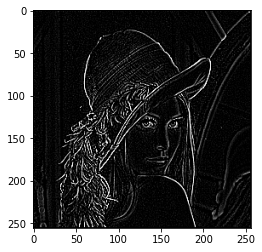

In [ ]:
# ラプラシアンフィルタを適用した後の画像を作成(要素は全て0)．
import numpy as np
out_img = np.zeros((256, 256))

# 8近傍型のカーネルを作成．
mask = [[-1, -1, -1], 
        [-1,  8, -1],
        [-1, -1, -1]]

# 画像の各画素に対して「mask」の処理を適用．
# 【補足】全画素に対してフィルタ処理を行うと，配列の範囲外を参照してしまう．
#         本課題では簡易化のため，画像の縁に対しては処理を行わない．
for x in range(1, 255):
  for y in range(1, 255):

    # 【補足】各画素に「mask」を掛けて足す演算を施す．
    out  = img[x-1][y-1] * mask[0][0] + img[x-1][y] * mask[0][1] + img[x-1][y+1] * mask[0][2]
    out += img[x][y-1] * mask[1][0] + img[x][y] * mask[1][1] + img[x][y+1] * mask[1][2]
    out += img[x+1][y-1] * mask[2][0] + img[x+1][y] * mask[2][1] + img[x+1][y+1] * mask[2][2]

    # 【補足】輝度値(画素値)が0～255の範囲外となった場合，
    #         0よりも小さいなら0に，255以上なら255にする．
    if(out < 0):
      out_img[x][y] = 0

    elif(out > 255):
      out_img[x][y] = 255

    else:
      out_img[x][y] = out

# エッジ(輪郭)検出後の画像の描画．
plt.imshow(out_img, cmap = "gray")